
<h1><b>Statistique en Bioinformatique : </b> TME1 </h1>
<br>
L’objectif de ce TME est l’analyse statistique d’une famille de protéines à travers son alignement de séquences:
<br>
<ul>
<li> objectif 1: détection des positions conservées, </li>
<li> objectif 2: détection de séquences qui appartiennent à la même famille, </li>
</ul>
<vr>
<div class="alert alert-warning" role="alert" style="margin: 10px">
<p>**Soumission**</p>
<ul>
<li>Renommer le fichier TME1.ipynb pour NomEtudiant1_NomEtudiant2.ipynb </li>
<li>Soumettre via Moodle avant le prochain TME - <b> Une soumission par binome </b>.
</ul>
<br>
REMARQUE : Les fichiers seront aussi corrigés numériquement. Faites donc attention à <b> ne pas modifier la signature et le renvoi des fonctions! </b>
<br>
</div>

Nom etudiant 1 : GUILHON Henri
<br>
Nom etudiant 2 : K.MURALI Sharane
<br>

<b>DONNÉES</b> <br>
Il y a 2 fichiers avec les données telecharché à (<a href="http://www.lcqb.upmc.fr/julianab/teaching/SBAS/TME1.tar.gz"> TME1 </a> ): <br>
<ul>
<li> Dtrain.txt: C’est un alignement de M = 5643 protéines d’une seule famille en format FASTA,
<br>
    Les lignes qui commencent avec “>” contiennent des commentaires (nom de la protéine etc.). Elles n’ont aucune importance pour notre projet. Les autres lignes contiennent les séquences, que l’on va utiliser dans le projet. Les séquences sont alignées, elles ont toutes la même longueur (L = 48 positions dans notre fichier). Chaque position i = 0, ..., L − 1 d'une séquence contient soit un acide aminé (A,C,...,Y, il y en a 20) ou un trou (–), que l'on considère comme 21ème lettre. Ensemble elles forment l'alphabet: 
    A =  {A, C, D, E, F, G, H, I, K, L, M, N, P, Q, R, S, T, V, W, Y, -}, avec q = 21 lettres différentes.
</li>
    <br>
<li> testseq.txt:  testseq.txt: Même format de Dtrain.txt, mais avec une seule séquence b = (b0 , ..., bN −1 ) plus longue (longueur N = 114 > L). On va scanner cette séquence pour trouver une sous-séquence qui appartient à la famille definie par Dtrain.txt. </li>
</ul>

Exercice 1: Pour chaque position i = 0, ..., L − 1 de l' alignement et chaque acide aminé a ∈ A (trou compris), calculer le nombre d’occurences ni(a) et le poid ωi(a), où :
\begin{equation*}
n_{i}(a) = \textrm{nombre d'occurrences de l'acide aminé a dans la colonne i}
\end{equation*}

\begin{equation*}
\omega_i(a) = \frac{n_i(a)+1}{M+q}\ .
\end{equation*}

In [1]:
import sys
import numpy as np
import pandas as pd

aa = ['A', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'K', 'L', 'M', 'N', 'P', 'Q', 'R', 'S', 'T', 'V', 'W', 'Y', '-']

#aa = ['A', 'B', 'C', '-']

#aa = ['A', 'G', 'C', 'T', '-']
q = len(aa)

In [2]:
#load path Files
input_dataset_f = 'Dtrain.txt'
input_sequence_f = 'test_seq.txt'
#input_dataset_f = 'DtrainToy.txt'
#input_sequence_f = 'test_seqToy.txt'
#input_dataset_f = 'DtrainToyTD.txt'

In [3]:
#load DTrain File
def load_train(input_f):
    """Input 1 : a multiple sequence alignment (MSA) in FASTA format
    Output 1 : the MSA (see REMARK)
    Output 2 : the length of the aligned sequences (MSA length)
    Output 3 : the number of sequences in the MSA (MSA depth)
    
    REMARK : The MSA should be represented as an ordered collection of sequences.
    Meaning, the first sequence in the file must be the first sequence in the
    data structure. You can represent it as a list of lists of char, a list of 
    str, a numpy matrix, etc. Just be consistent throughout the whole TME1"""
    
    #train_seq_list va contenir la liste des différents séquences du fichier fasta 
    train_seq_list = []

    #Parcours du fichier pour enregistrer les différentes séquences dans la liste
    with open(input_f, 'r') as f:
        seq  = ''
        for line in f:
            if line[0] == '>':
                train_seq_list.append(seq)
                seq = ''
            else:
                seq += line.rstrip('\n')
        train_seq_list.append(seq)
    
    #Le pop est présent pour retirer une séquence vide présente en première position
    train_seq_list.pop(0)
    
    #On récupère les valeurs de la longueur L des séquences et le nombre m de séquences
    L = len(train_seq_list[0])
    m = len(train_seq_list)

    return train_seq_list, L, m

train_set, L, m = load_train(input_dataset_f)
print("Training data :")
#print(train_set)

print("\nMSA length", L)
print("MSA depth", m)
print("\n")

#Affichage en dataframe pour une visualisation 
for seq in train_set:
    #print("S"+str(train_set.index(seq))+" : ",seq)
    print("  S{}\t: {}".format(train_set.index(seq), seq))

Training data :

MSA length 48
MSA depth 5643


  S0	: -ALYDCEAENSDELTFNRGEIIQLIDRPDNDWWEGFIQSDSRRGMFPV
  S1	: KAIYNCSADHPDELTFSEGEVLVVDGEEDSDWWFGHVENESRRGVFPV
  S2	: KALYNCVADNADELTFSEGEMIIVDGEEDKEWWVGHIDGETRRGVFPV
  S2	: KALYNCVADNADELTFSEGEMIIVDGEEDKEWWVGHIDGETRRGVFPV
  S4	: KAVYNCVADNPDELTFAEGEVIVVDGEEDQEWWVAGPHRR--------
  S4	: KAVYNCVADNPDELTFAEGEVIVVDGEEDQEWWVAGPHRR--------
  S6	: KALYNCLADNPDELTFTEGEVIVVDGEEDQEWWKGHIEGDTRRGVFPT
  S7	: KALYNCVADNPDELTFSEGDVIIVDGEEDQEWWIGHIDGDGRKGAFPV
  S7	: KALYNCVADNPDELTFSEGDVIIVDGEEDQEWWIGHIDGDGRKGAFPV
  S7	: KALYNCVADNPDELTFSEGDVIIVDGEEDQEWWIGHIDGDGRKGAFPV
  S10	: KALYNCVADNPDELTLSEGDVIIVDGEEDQEWWIGHIDGESRKGAFPV
  S11	: KALYNCVADNPDELTFSEGDVIIVDGEEDQEWWIGHIDGESRKGAFPV
  S11	: KALYNCVADNPDELTFSEGDVIIVDGEEDQEWWIGHIDGESRKGAFPV
  S11	: KALYNCVADNPDELTFSEGDVIIVDGEEDQEWWIGHIDGESRKGAFPV
  S14	: KAIYHCSADNPDELTFSEGEIIVVDGEEDKEWWIGHIDGENRRGAFPV
  S15	: -TIYDCQADNDDELTFMEGEVIVVTGEEDQEWWIGHIEGQERKGVFPV
  S16	: -TIYDCQADNDDELTFVEGEVIIVTGEEDQEWWIGHIEGQER

  S2959	: VAIYNYNASQDVELSLQIGDTVHILEM-YEGWYRGYTL----------
  S2960	: VAIYNYNASQDVELSLQIGDTVHILEM-YEGWYRGYALQNSKKGIFP-
  S2961	: VAIYNYNASQDVELSLQIGDTVHILEM-YEGWYRGYRLQNSKKGIFP-
  S2962	: VAFYNYDARGADELSLQIGDTVHILE-TYEGWYRGYTLRKSKKGIFPA
  S2962	: VAFYNYDARGADELSLQIGDTVHILE-TYEGWYRGYTLRKSKKGIFPA
  S2962	: VAFYNYDARGADELSLQIGDTVHILE-TYEGWYRGYTLRKSKKGIFPA
  S2962	: VAFYNYDARGADELSLQIGDTVHILE-TYEGWYRGYTLRKSKKGIFPA
  S2966	: VAVYNYDARSNEELSLQIGDTVHILE-TYEGWYRGYRLRRSKKGVFPA
  S2967	: VAIYNYHGNGETKLDLTVGDTLHILE-ENDGWFRGFKLRNSVKGIFPT
  S2968	: -VIYNFNEKGAHKLKLQLGETVQVLE-ENGGWYRGFSLRNNSRGIFP-
  S2969	: VAIYNFQGSEAQHLTLQIGDVVRIQE-TCGDWYRGYLIKHLSQGIFPT
  S2969	: VAIYNFQGSEAQHLTLQIGDVVRIQE-TCGDWYRGYLIKHLSQGIFPT
  S2969	: VAIYNFQGSEAQHLTLQIGDVVRIQE-TCGDWYRGYLIKHLSQGIFPT
  S2972	: ---------SSMELDLQPGDVVKVLESAALGWVRARVIR---------
  S2973	: ----------DMELDLQPGDVVKVLESAALGWVRARVIR---------
  S2974	: IALYNFFSTDEEELTLEEGDIIDIIEEADDGWWKGVKICGNKEGICP-
  S2975	: RALYDYESAEPSDLNLKAGDIISVIQQDDGGWTKGRNYEG-NEGIF

  S4959	: KALYDYKAKRSDELSFCRGALIHNVSKEPGGWWKGDYGTR-IQQYFPS
  S4959	: KALYDYKAKRSDELSFCRGALIHNVSKEPGGWWKGDYGTR-IQQYFPS
  S4961	: KALYDYRAMRPDELTFSKGVLIHNVTRDTNGWWKGDYGGK-LQHYFPS
  S4961	: KALYDYRAMRPDELTFSKGVLIHNVTRDTNGWWKGDYGGK-LQHYFPS
  S4961	: KALYDYRAMRPDELTFSKGVLIHNVTRDTNGWWKGDYGGK-LQHYFPS
  S4964	: RALYCYQATRPDELSFNKGALIYNVSKETDDWWKGDYGGK-VQFFFP-
  S4965	: RALWDYEGINDQEMTFCRGAFITNVVKEDSGWWIGDYGDQ-KQKLFPA
  S4966	: KALFDYTAVRPDELSFCKDAVITNVEKHGGGWWKGDCGNK-NQKWFPA
  S4967	: KALYSYKADKPDELSFPKHAIITNVQRNNSMWWKGDYG----------
  S4967	: KALYSYKADKPDELSFPKHAIITNVQRNNSMWWKGDYG----------
  S4967	: KALYSYKADKPDELSFPKHAIITNVQRNNSMWWKGDYG----------
  S4970	: KALYSYKADKPDELSFPKHAIITNVQRNNSMWWRGDYG----------
  S4971	: KALYSYKANKPDELSFPKHAIITNVQRNNTMWWIGDYG----------
  S4971	: KALYSYKANKPDELSFPKHAIITNVQRNNTMWWIGDYG----------
  S4973	: KALYSYKASKPDELSFPKHAIITNVQRDNSMWWIGDYG----------
  S4974	: KALYSYKANKPDELSFPKHAIITNVQRDNSMWWIGDYG----------
  S4974	: KALYSYKANKPDELSFPKHAIITNVQRDNSMWWIGDYG--------

In [4]:
#Computing wi(a)
def get_pwm(train_set, L, m, alphabet):
    """Input 1 : The MSA (see REMARK of the load_train function)
    Input 2 : the MSA length
    Input 3 : the MSA depth
    Input 4 : the alphabet used (it must be an ordered collection of non-repeating characters)
    Output 1 : position-weight matrix of shape (q, L) where q is len(alphabet)"""
    
    #Initialisation d'un array vide de dimensions q(longueur de l'alphabet) et L la longueur 
    PWM = np.zeros((len(alphabet),L))    
    
    #Parcours sur chaque séquence de la liste
    for seq in train_set: 
        #Parcours sur la longueur de la séquence
        for i in range(L):
            #Incrémentation des occurences de l'alpahbet en fonction de la position
            PWM[alphabet.index(seq[i]),i] += 1 
    
    #Mise à jour avec le pseudocount
    if 0 in PWM:
        PWM += 1
    
    #Normalisation    
    PWM /= (m+len(alphabet))
    
    return PWM


PWM = get_pwm(train_set, L, m, aa)
print('PWM shape :',PWM.shape)
#print(PWM)

#Afficahge en dataframe pour visulaiser la réprésentation de PWM 
dfPWM = pd.DataFrame(PWM,index=aa,columns=range(L))
dfPWM

PWM shape : (21, 48)


,0,1,2,3,4,5,6,7,8,9,...,38,39,40,41,42,43,44,45,46,47
A,0.000177,0.725282,0.010240,0.023129,0.057556,0.000177,0.043609,0.487112,0.080155,0.049612,...,0.046610,0.003708,0.005826,0.037076,0.017832,0.006356,0.003531,0.034251,0.000177,0.238171
C,0.000177,0.000177,0.001942,0.002295,0.000353,0.018008,0.009004,0.000177,0.007415,0.003884,...,0.001589,0.000353,0.001059,0.014477,0.006179,0.000353,0.001412,0.007592,0.000177,0.016949
D,0.000177,0.000177,0.000353,0.001766,0.535134,0.000177,0.091102,0.001412,0.073270,0.109463,...,0.106638,0.034781,0.006886,0.020127,0.013595,0.000177,0.000353,0.000177,0.000177,0.000177
E,0.000177,0.000177,0.021893,0.000706,0.036370,0.000177,0.198446,0.012888,0.133298,0.131356,...,0.032839,0.010770,0.021010,0.098694,0.167903,0.000177,0.000530,0.000177,0.000177,0.000177
F,0.000177,0.000177,0.001942,0.127472,0.000353,0.404308,0.003884,0.000177,0.000353,0.004590,...,0.003708,0.000883,0.001942,0.003531,0.035664,0.002119,0.092867,0.464689,0.000177,0.000177
G,0.000177,0.001059,0.000530,0.004061,0.009887,0.000177,0.002825,0.143008,0.026483,0.089866,...,0.055261,0.033192,0.563030,0.037253,0.000883,0.928319,0.000177,0.000177,0.000177,0.000177
H,0.000177,0.000177,0.000353,0.054025,0.003708,0.010240,0.010064,0.000177,0.011476,0.049435,...,0.010770,0.001942,0.006003,0.024894,0.005473,0.001412,0.004944,0.000177,0.000177,0.018008
I,0.098870,0.000177,0.119527,0.001236,0.000177,0.000177,0.022246,0.000706,0.010064,0.013065,...,0.004061,0.003531,0.000530,0.015007,0.076095,0.000177,0.139831,0.144951,0.000177,0.000177
K,0.132592,0.000177,0.065678,0.008298,0.018538,0.000177,0.077154,0.050141,0.042903,0.040960,...,0.044668,0.011829,0.023129,0.186617,0.061970,0.001942,0.004767,0.000177,0.000177,0.043256
L,0.000177,0.000177,0.558263,0.012182,0.000177,0.004944,0.010946,0.002119,0.008828,0.012712,...,0.013771,0.001942,0.004944,0.028425,0.008298,0.004061,0.273658,0.031427,0.000177,0.000177


Exercise 2: Trouvez les positions les plus conservées en utilisant l’entropie relative.
<br>
2.1) Pour chaque position i = 0, ..., L − 1, determiner l’entropie relative Si<br>
\begin{equation*}
\label{eq:entropie}
S_i = \log_2(q) + \sum_{a\in {\cal A}} \omega_i(a)\cdot \log_2\left[\omega_i(a) \right]\ .
\end{equation*}
<br>


In [5]:
#Computing Si
def si_calculate (wi):
    """Input 1 : Weight vector (of length q) representing column i of the MSA
    Output 1 : Relative entropy of column i"""   
    
    #q correspond à la longueur de l'alphabet
    #Application de la formule et compaction du code avec np.sum()
    return np.log2(len(wi))+np.sum(wi*np.log2(wi))

#Make a vector Si of length L containing the relative entropy of each position (column) of the MSA

#Création du vecteur Si sous forme d'array numpy de dimensions(L)
Si = np.zeros(L)
for i in range(L):
    Si[i] = si_calculate(PWM[:,i])

#Affichage en dataframe pour une visualisation du vecteur
dfsi = pd.DataFrame(Si, columns=['Entropie'], index=range(L))
dfsi

,Entropie
0,1.854766
1,3.180778
2,2.053194
3,2.535683
4,1.914097
5,2.821574
6,0.734250
7,1.994170
8,0.791154
9,0.620221


2.2) Indiquez les acides aminees (ai*) des trois positions les plus conservées : 
\begin{equation}
\label{eq:conserved}
a_i^\star = {\rm argmax}_{a\in {\cal A}} \omega_i(a)\ .
\end{equation}

In [6]:
#computing ai*
def get_aiStart(Si, PWM, naa):
    """Input 1 : Relative entropy vector of length L
    Input 2 : position-weight matrix of shape (q, L)
    Input 3 : 0 < int < q+1, specifying the number of top-conserved residues
    Output 1 : list of length naa containing the amino acid type (char) of the 
    top-naa conserved columns"""
    
    # Dans la formule de Si nous avons omis un - dans la formule, d'où le argmax au lieu du armgin, les plots seront inversés
    # Car l'entropie modélise le "désordre" relatif à une position dans l'alignement, que l'on voudrait donc minimiser
    
    #np.argpartition permet de faire une partition de manière indirecte et ici retourne dans l'ordre la position 
    #des colonnes les plus conservés
    arguments = np.argpartition(Si, -naa)[-naa:]

    #Retour d'une liste qui récupère l'AA le plus présent dans les positions conservées.
    return [aa[np.argmax(PWM[:,arg])] for arg in arguments]

#On fixe naa à 3 pour observer les trois positions les plus conservées
naa = 3
print('Les {} acides aminés les plus conservés : {}'.format(naa, get_aiStart(Si, PWM, naa)))

Les 3 acides aminés les plus conservés : ['G', 'P', 'W']


2.3) Tracer l’entropie rélative en fonction de chaque position i.

In [7]:
import matplotlib.pyplot as plt

Les 3 acides aminés les plus représentés sont ['G', 'P', 'W'] aux positions [43 46 31]


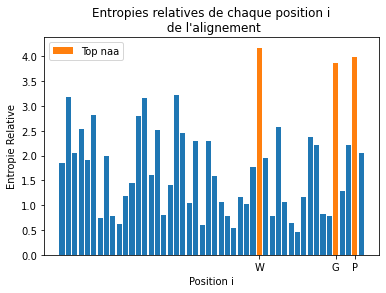

In [8]:
#plot entropy
def plot_entropy(Si, PWM, naa):
    """For each of the L positions of the MSA, plot its entropy.
    
    BONUS : highlight the top-naa conserved sites, and print the
    most abundant amino acid type on top of the naa identified positions"""
    
    #Récupération des positions les plus conservées
    arguments = np.argpartition(Si, -naa)[-naa:]
    
    #Plot de toutes les entropies relatives
    plt.bar(np.arange(len(Si)), Si)
    
    #Configuration du plot
    plt.title('Entropies relatives de chaque position i\n de l\'alignement')
    plt.xlabel('Position i')
    plt.ylabel('Entropie Relative')
    
    #Affichage des aa les plus représentés sur le plot
    top_naa = get_aiStart(Si, PWM, naa)
    print('Les {} acides aminés les plus représentés sont {} aux positions {}'.format(naa,top_naa, arguments))
    plt.bar(arguments, Si[arguments], label='Top naa', tick_label=top_naa)
    
    plt.legend()
    plt.savefig('entropy.png', dpi=300)
    
plot_entropy(Si, PWM, naa)

Exercise 3: Déterminer les paramètres f(0)(b) du modèle nul, où
\begin{equation}
f^{(0)}(b) = \frac 1L \sum_{i=0}^{L-1} \omega_i(b)\ ,
\end{equation}

In [9]:
#computing f0
def f0_calcule(PWM):
    """Input 1 : position-weight matrix of shape (q,L)
    Output 1 : vector of size q containing the null model """
    
    #Applicaton de la formule et compaction de la formule avec np.sum()
    return np.sum(PWM, axis=1)/len(PWM[0])

#Affichage des paramètres f_0
f_0 = f0_calcule(PWM)
print(f_0)

#Affichage en DataFrame pour une visualisation du vecteur de paramètres f_0
df0 = pd.DataFrame(f_0, columns=['f0'], index=aa)
df0

[0.05880709 0.00751089 0.08008916 0.08491496 0.04194253 0.09048008
 0.01268244 0.05049067 0.05113804 0.07445048 0.01191369 0.03564545
 0.03793329 0.03431026 0.04506165 0.04843824 0.04072505 0.05916019
 0.0365981  0.03855491 0.05915284]


,f0
A,0.058807
C,0.007511
D,0.080089
E,0.084915
F,0.041943
G,0.090480
H,0.012682
I,0.050491
K,0.051138
L,0.074450


Exercise 4: (à appliquer à testseq.txt): Déterminer l(bi,...,bi+L−1)  pour chaque sous-séquence de longueur L. 
Déterminer si il y a des sous-séquences de la famille definie par Dtrain. 
Tracer la log-vraisemblance en fonction de sa première position i = 0, ..., N − L.
\begin{equation}
\label{eq:ll}
\ell(b_0,...,b_{L-1}) = \log_2 \frac {P(b_0,...,b_{L-1} | \omega )
}{P^{(0)}(b_0,...,b_{L-1})}
= \sum_{i=0}^{L-1} \log_2 \frac {\omega_i(b_i)}{f^{(0)}(b_i)}\ .
\end{equation}

4.1: Faites une fonction pour calculer la log-vraisemblance, d'une séquence de taille L.

In [10]:
#computing log-likehood
def loglikehood(seq, PWM, f_0, L, aa):
    """Input 1 : sequence of which you want to calculate the log-likelihood
    Input 2 : position-weight matrix of shape (q,L)
    Input 3 : null model vector of length q
    Input 4 : MSA length
    Output 1 : log-likelihood of the sequence seq"""
    
    #La somme des logs correspond au log des produits
    #P_omega contient la probabilité d'apparition de la séquence sachant les paramètes omega
    P_omega = np.prod([ PWM[ aa.index(seq[i]), i] for i in range(L)])
    
    #P_null contient la probabilité d'apparition de la séquence avec les paramètres f_0
    P_null = np.prod([ f_0[ aa.index(seq[i])] for i in range(L)])
    
    return np.log2(P_omega/P_null)

# Test the log-likelihood on the sequences of the data set
test, L_test, m_test = load_train(input_sequence_f)
seq = test[0]

4.2: Faites une fonction qui etant donné une séquence de taille supérieur à k génère toutes les sous-séquences de taille k. Avec cette fonction, trouvez toutes les sous-séquences de taille L de la séquence en testseq.txt

In [11]:
#computing sliding_window 
def sliding_window (seq, k):
    """Input 1 : sequence of length > k
    Input 2 : window length (int)
    Output 1 : list of windows of length k generated from sequence seq"""
    
    #Liste crée avec une compréhension 
    return [seq[i:i+k] for i in range(len(seq)-k+1)]


# Find all subsequences of length L from the sequence in testseq.txt
print('Toutes les combinaisons de séquences de taille {} \ndans la séquence :\n\n{}\n'.format(L,seq))

subseqs = sliding_window(seq, L)
print('On trouve {} sous-séquences différentes:\n'.format(len(subseqs)))

for sub_seq in subseqs:
    print(sub_seq)

Toutes les combinaisons de séquences de taille 48 
dans la séquence :

PPAAAPQPKEPRYKALYDFAGQSAGELSLGKDEIILVTQKENNGWWLASRLDKSASGWAPSAYLEEVVQRVAAAPPARPVNGAAGGKPKPPAPPAKRPAARKAVNGDSARDSGY

On trouve 67 sous-séquences différentes:

PPAAAPQPKEPRYKALYDFAGQSAGELSLGKDEIILVTQKENNGWWLA
PAAAPQPKEPRYKALYDFAGQSAGELSLGKDEIILVTQKENNGWWLAS
AAAPQPKEPRYKALYDFAGQSAGELSLGKDEIILVTQKENNGWWLASR
AAPQPKEPRYKALYDFAGQSAGELSLGKDEIILVTQKENNGWWLASRL
APQPKEPRYKALYDFAGQSAGELSLGKDEIILVTQKENNGWWLASRLD
PQPKEPRYKALYDFAGQSAGELSLGKDEIILVTQKENNGWWLASRLDK
QPKEPRYKALYDFAGQSAGELSLGKDEIILVTQKENNGWWLASRLDKS
PKEPRYKALYDFAGQSAGELSLGKDEIILVTQKENNGWWLASRLDKSA
KEPRYKALYDFAGQSAGELSLGKDEIILVTQKENNGWWLASRLDKSAS
EPRYKALYDFAGQSAGELSLGKDEIILVTQKENNGWWLASRLDKSASG
PRYKALYDFAGQSAGELSLGKDEIILVTQKENNGWWLASRLDKSASGW
RYKALYDFAGQSAGELSLGKDEIILVTQKENNGWWLASRLDKSASGWA
YKALYDFAGQSAGELSLGKDEIILVTQKENNGWWLASRLDKSASGWAP
KALYDFAGQSAGELSLGKDEIILVTQKENNGWWLASRLDKSASGWAPS
ALYDFAGQSAGELSLGKDEIILVTQKENNGWWLASRLDKSASGWAPSA
LYDFAGQSAGELSLGKDEIILVTQKENNGWWLASRL

4.3: Calculer la log-vraisemblance pour toutes les sous-sequences trouvées en 4.2 et tracer un graphique de log-vraisemblance, avec en abscisse la position initiale de la sous-sequence.

In [12]:
#computing log-likelihood
def likelihoodAllSousSeq(subseqs, PWM, f_0, k, aa):
    """Input 1  : list of all subsequences of length k
       Input 2  : position-weight matrix of length shape (q,k)
       Input 3  : null model vector of length k
       Input 4  : length of each subsequence
       Output 1 : log-likelihood vector of length len(subseqs) - k + 1
    
    REMARK : The length of the subsequences must match the
    number of columns in the PWM and the length of the null model!"""
    
    #Array numpy faite avec une compréhension et un application de la fonction loglikehood pour chaque sous-séquence
    return np.array([loglikehood(seq, PWM, f_0, k, aa) for seq in subseqs])

#Affichage de l'array de log-likelihood sur chaque sous-séquence de la séquence 
llAllSeq = likelihoodAllSousSeq(subseqs, PWM, f_0, L, aa)
print(llAllSeq)

def plot_likelihood(lhs):
    """Input 1 : log-likelihood vector"""
    
    #Affichage du plot
    plt.bar(np.arange(len(lhs)), lhs)
    argument = np.argpartition(lhs, -1)[-1:]
    
    #Affichage de la valeur particulière
    plt.bar(argument, lhs[argument], tick_label=argument)
    
    #Configuration du plot
    plt.title('Log-vraisemblance de chaque alignement\nen fonction de la position initiale de la sous-séquence')
    plt.xlabel('Position initiale de la sous-séquence ')
    plt.ylabel('Log-vraisemblance')
    print('Les sous-séquences les plus représentées sont aux positions {}'.format(argument))

    plt.savefig('likelihood.png', dpi=300)



[-115.79642121 -116.97067757  -98.77761076 -119.54265538 -161.88402549
 -129.9559493  -117.67621582 -155.03902809 -169.51474735 -143.18165511
 -155.30035036  -96.53548822 -119.48296348   72.84331609 -139.31137984
 -130.46926028 -152.22619015 -163.42192392 -147.62988788 -145.62432011
 -142.66217743 -149.23171864 -125.50762874 -117.69801127 -153.70149829
 -132.12024146 -106.66879589 -161.00431197 -146.12346236 -136.53609245
 -145.16138482 -139.16307927 -125.21380256 -126.92954122 -155.90445156
 -134.07806655 -130.5234111  -148.00077981 -130.54172021 -130.00971075
 -165.79996066 -120.50871768 -132.11248035 -146.66020756  -86.80389798
 -124.35200486 -106.03151696 -108.14885096 -133.96017997 -143.81263346
 -143.49774911 -111.4033755  -140.4298707  -134.06689891 -146.16743336
 -134.00652005 -165.15030463 -119.65776105 -133.01689592 -153.60946889
 -127.27260979 -133.96372647 -151.26389625 -165.80645003 -131.46725556
 -141.56367951 -132.69935928]


Les sous-séquences les plus représentées sont aux positions [13]


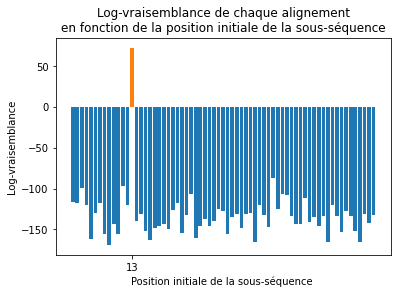

In [13]:
#plotting log-likelihood for each initial position
plot_likelihood(llAllSeq)

In [14]:

n = np.argpartition(llAllSeq, -1)[-1:]
print(n)

print(seq)
tab = ' '*int(n)
for i in range(50):
    print(tab+train_set[i])

[13]
PPAAAPQPKEPRYKALYDFAGQSAGELSLGKDEIILVTQKENNGWWLASRLDKSASGWAPSAYLEEVVQRVAAAPPARPVNGAAGGKPKPPAPPAKRPAARKAVNGDSARDSGY
             -ALYDCEAENSDELTFNRGEIIQLIDRPDNDWWEGFIQSDSRRGMFPV
             KAIYNCSADHPDELTFSEGEVLVVDGEEDSDWWFGHVENESRRGVFPV
             KALYNCVADNADELTFSEGEMIIVDGEEDKEWWVGHIDGETRRGVFPV
             KALYNCVADNADELTFSEGEMIIVDGEEDKEWWVGHIDGETRRGVFPV
             KAVYNCVADNPDELTFAEGEVIVVDGEEDQEWWVAGPHRR--------
             KAVYNCVADNPDELTFAEGEVIVVDGEEDQEWWVAGPHRR--------
             KALYNCLADNPDELTFTEGEVIVVDGEEDQEWWKGHIEGDTRRGVFPT
             KALYNCVADNPDELTFSEGDVIIVDGEEDQEWWIGHIDGDGRKGAFPV
             KALYNCVADNPDELTFSEGDVIIVDGEEDQEWWIGHIDGDGRKGAFPV
             KALYNCVADNPDELTFSEGDVIIVDGEEDQEWWIGHIDGDGRKGAFPV
             KALYNCVADNPDELTLSEGDVIIVDGEEDQEWWIGHIDGESRKGAFPV
             KALYNCVADNPDELTFSEGDVIIVDGEEDQEWWIGHIDGESRKGAFPV
             KALYNCVADNPDELTFSEGDVIIVDGEEDQEWWIGHIDGESRKGAFPV
             KALYNCVADNPDELTFSEGDVIIVDGEEDQEWWIGHIDGESRKGAFPV
            